# Dependancies

In [2]:
from lib import * #import dependancies and global_variables
import classifier, generator, utils #import packages cooresponding to the classification and dance generation aspects and the data/misc helper functions, respectively

In [2]:
from importlib import reload
def reload_packages():
    reload(classifier)
    reload(generator)
    reload(utils)

# Data

**Aquisition**\
To keep the scope of the project manageable, the number of dance genres used for testing and generation was limited to one: contemporary dance. The motion capture (MoCab) data were obtained from the [Dance Motion Capture Database][1] of the University of Cyprus, an online resource hosting a digital archive of dances captured using state-of-the-art technology. More information can be found by visiting their [website][1]. 

*Each dance is recorded and labeled with an emotion*. This emotion tag was significant in determining sentiment (attitude) later.

**Data Exploration**\
[bvh](https://pypi.org/project/bvh/) is a useful tool for exploring motion file data from BVH files through code without any data conversion

**File Conversion**\
[bvhtoolbox][2] and [bvh-converter][3] were used for the conversion process.

**BVH to CSV**\
Although both libraries support bvh to csv conversion, [bvh-converter][3] provided an optimized method thereby making the conversion process faster.\
[Bvhtoolbox][2] was used to generate a hierarchy file for each unique dancer.

**CSV to BVH**\
[bvhtoolbox][2] was used to convert the coreographed dance from a csv file representation to a BVH file for visualization in [Autodesk Motion Builder](https://www.autodesk.com/products/motionbuilder/overview?term=1-YEAR&support=null).\
The particularities of the `csv2bvh <hierarchy_file>.csv <position_file>.csv <rotation_file>.csv` require specific formating and file organization:
- Order of the joints channels in the rotation file *must* coorespond to the hierarchal order as defined in the given file
- The time feature in the positional/rotational file *must* be all lowercase
- The rotational file must contain every joint listed in the hiearchal file (though the postional file need only the root channels).

[1]:http://dancedb.cs.ucy.ac.cy
[2]:https://pypi.org/project/bvhtoolbox/
[3]:https://pypi.org/project/bvh-converter/

# Variables

Most variables are stored in the lib package and are global in nature.\
The following two segments are for determining what to run in the **notebook** and cooresponding **python file**, *respectively*.

In [9]:
# Run in Jupyter Notebook
class Args():
    def __init__(self):
        self.train = False
        self.predict = True
        self.evaluate = False
args = Args()

In [4]:
""" Do NOT run in Jupyter Notebook, otherwise will recieve error
    This allows you to determine what to run when running the file in the command line
"""
parser = argparse.ArgumentParser()

#store_true: default is False, sets the value to True if the respective tag is called
#store_false: default is True, sets the value to False if the respective tag is called
parser.add_argument('--train', action="store_true",
                   help='Train on dataset')
parser.add_argument('--evaluate', action="store_true",
                   help='Run an evaluation on the trained model')
parser.add_argument('--predict', action="store_true",
                   help='Generate a dance using the trained model')

args = parser.parse_args()

'parser = argparse.ArgumentParser()\n\n#store_true: default is False, sets the value to True if the respective tag is called\n#store_false: default is True, sets the value to False if the respective tag is called\nparser.add_argument(\'--train\', action="store_true",\n                   help=\'Train on dataset\')\nparser.add_argument(\'--evaluate\', action="store_true",\n                   help=\'Run an evaluation on the trained model\')\nparser.add_argument(\'--predict\', action="store_true",\n                   help=\'Generate a dance using the trained model\')\n\nargs = parser.parse_args()'

# Major Imported Function Descriptions

**General**

`utils.create_dir(path)`\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Create the cooresponding directory files for the given path if it does not yet exist.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Returns the created directory filepath as a *str* \
`utils.write(output="", file=sys.stdout)`\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Display a string to an output stream. This allows for status updates to be outputted to a file. Default is a console log.\

**Set-Up Model**

`generator.establish_model(...)`\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Establish the architecture (layers and how they are connected) of the model with freshly initialized state for the weights. There is NO compilation information.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Returns the model's architecture as a *keras.Model* \
`generator.compile_model(model, optimizer, loss)`\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Compile the given model so that it is ready for training and/or prediction/evaluation\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Returns the compiled model as a *keras.Model* \
`generator.model_summary(model)`\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Convert the model architecture summary to a writeable format\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Returns the visual diagram of the model as a *[str]* \

**Load Model**

`generator.load_architecture(file)`\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Load the architecture (layers and how they are connected). Model can be created with a freshly initialized state for the weights. There is NO compilation information in this savefile.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Returns an uncompiled model as a *keras.Model* \
`generator.load_trained_model(file)`\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Load the pre-trained model. Compiled when loaded so training/prediction/evaluation can be restarted right where the model left off.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Returns the model from the file pre-compiled as a *keras.Model* \

**Task Related**

`generator.train_model(model, out_file)`\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Trains the model with the dance data.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The History object's History.history attribute is a record of training loss values and metrics values at successive epochs, as well as cooresponding validation values (if applicable).\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Returns the class containing the training metric information, the trained model, and the comprehensive evaluation data as a *tuple* \
`generator.benchmark(model, eval_X, eval_Y, out_file)`\
`generator.generate_dance(model, frames, out_file = out_file)`\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Generate a dance sequence with the given model

# AI Functions

In [5]:
def train_generator(out_file=sys.stdout):
    """ Trains the model with the dance data.
        The History object's History.history attribute is a record of training loss values and metrics values at successive epochs, 
            as well as cooresponding validation values (if applicable).  

    :param out_file: what to display/write the status information to
    :type output stream
    :return: the class containing the training metric information, the trained model, and the comprehensive evaluation data
    :type tuple
    """
    model = generator.establish_model(units, look_back, n_features, layer_activation, recurrent_activation, weight_initializer, recurrent_initializer, bias_initializer, output_activation)
    model = generator.compile_model(model, optimizer, loss_function)
    utils.write(generator.model_summary(model), out_file)
    return generator.train_model(model, out_file)

def evaluate_generator(model, eval_X, eval_Y, save_location, out_file):
    if(not model):
        #loads the most recent saved model
        filename = [f for f in os.listdir(logs_save_dir) if "model" in f][-1]
        model = generator.load_trained_model(os.path.join(save_location, filename))
        utils.write(generator.model_summary(model), out_file)
        eval_X = np.load(evaluation_filename+"_X.npy")
        eval_Y = np.load(evaluation_filename+"_Y.npy")
    return generator.benchmark(model, eval_X, eval_Y, out_file)
    
def choreograph_dance(model, save_location, out_file):
    if(not model):
        #loads the most recent saved model
        filename = [f for f in os.listdir(logs_save_dir) if "model" in f][-1]
        model = generator.load_trained_model(os.path.join(save_location, filename))
        utils.write(generator.model_summary(model), out_file)
    generator.generate_dance(model, frames, out_file = out_file)

In [10]:
def plot_training_history(history, title):
    # summarize history for loss
    figure, (axis1, axis2) = plt.subplots(2, 1, sharex=True) 
    
    axis1.plot(history['loss'], label='train') 
    axis1.plot(history['val_loss'], label='validation')
    axis1.set_ylabel('Loss')#, labelpad=25
    
    axis2.plot(history['accuracy'], label='train') 
    axis2.plot(history['val_accuracy'], label='validation')
    axis2.set_ylabel('Accuracy')#, labelpad=25
    
    axis2.set_xlabel('Epoch')#, labelpad=25
    figure.suptitle(title)
    
    figure.legend(loc="upper right")
    figure.align_ylabels()
    
    figure.savefig('../graphics/generator/training_history.png', dpi = 500, transparent=True)

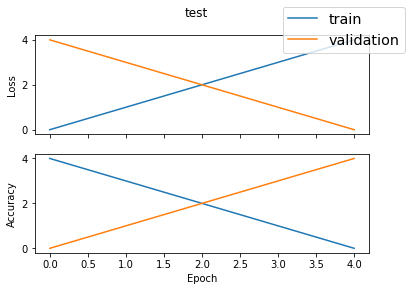

In [60]:
def get_unique_figure_labels(figure):
    f_handles = []
    f_labels = []
    for axis in figure.get_axes():
        a_handles, a_labels = axis.get_legend_handles_labels()
        f_handles+=a_handles
        f_labels+=a_labels
    by_label = dict(zip(f_labels, f_handles))
    return by_label

def get_unique_axis_labels(axis):
    handles, labels = axis.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    return by_label

def plot_history(history, title, base_label, validation_label='validation'):
    # summarize history for loss
    figure, (axis1, axis2) = plt.subplots(2, 1, sharex=True) 
    
    if len(history)==1:
        print('sdfsdf')
    
    axis1.plot(history['loss'], label=base_label) 
    axis1.set_ylabel('Loss')#, labelpad=25
    
    axis2.plot(history['accuracy'], label=base_label) 
    axis2.set_ylabel('Accuracy')#, labelpad=25
    
    if('val_loss' in history):
        axis1.plot(history['val_loss'], label=validation_label)
        axis2.plot(history['val_accuracy'], label=validation_label)
        
    axis2.set_xlabel('Epoch')#, labelpad=25
    figure.suptitle(title)
    figure.align_ylabels()
    
    by_label = get_unique_figure_labels(figure)
    figure.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize='x-large')
    figure.savefig('test.png', dpi = 500, transparent=True)
plot_history(test, 'test', 'train')

# Run Script

In [11]:
def main(save_location, out_file=sys.stdout):
    """ Driver function to control what is run and when if this is the main python script being ran.
        As the project was developed in a jupyter notebook, everything is self-contained in the main file.
        Any expansion, however, would be able to use the predefined classes and functions for whatever purpose without running anything.
    """
    history, model, eval_X, eval_Y = None, None, None, None

    if(not args.train and not args.evaluate and not args.predict):
        print("Type -h and get a list of possible tasks. You may select multiple.")
    else:
        if(args.train):
            history, model, eval_X, eval_Y = train_generator(out_file)
            plot_training_history(history.history, "Training History")
        if(args.evaluate):
            history = evaluate_generator(model, eval_X, eval_Y, save_location, out_file)
            print (history)
        if(args.predict):
            choreograph_dance(model, save_location, out_file)
        
if __name__ == "__main__":
    #reload_packages()
    utils.create_dir(np_save_dir)
    save_location = utils.create_dir(logs_save_dir)
    out_file = open(os.path.join(save_location, "outfile.txt"), "w")
    main(save_location, out_file)
    out_file.close()

Generating dance with seed from Olivia_Miserable_0
1.0-diversity Predicting Beginning:	Wed Mar 10 19:24:17 2021
1.0 Progress: [############################################################] 500/500
Generation Complete --- 0.3358269214630127 minutes ---
Saved generated dance position and rotation csv:
	../logs/units-1000_timesteps-50/generated_dance_500-frames_1.0-diversity
